# Predict Customer Clicked Ads Classification By Using Machine Learning

### **Import Libraries and Settings**

In [1]:
# Import initial necessary libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Settings of dataframe display
pd.options.display.max_columns = 100
pd.options.display.max_colwidth = None

# Version requirements
print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.26.4
pandas version :  2.2.1
seaborn version :  0.13.2


## Load Dataset

In [2]:
df = pd.read_csv('Clicked Ads Dataset.csv')

In [3]:
df.sample(10)

Unnamed: 0  Daily Time Spent on Site  Age  Area Income  \
817         817                     54.47   23  327460630.0   
411         411                     78.68   29  463580040.0   
247         247                     57.05   41  351952230.0   
356         356                     37.45   47  218967070.0   
153         153                     65.40   33  466893840.0   
335         335                     38.94   41  403109000.0   
97           97                     39.94   41  454490330.0   
561         561                     38.35   41  244202070.0   
486         486                     83.97   40  464041690.0   
189         189                     39.86   36  228155130.0   

     Daily Internet Usage       Male        Timestamp Clicked on Ad  \
817                141.52        NaN  3/26/2016 19:37           Yes   
411                208.05  Perempuan  1/16/2016 16:40            No   
247                   NaN  Laki-Laki    1/9/2016 3:45           Yes   
356                167.86  Perempuan   4/10/2016 3:30           Yes   
153                247.31  Perempuan  2/12/2016 22:51            No   
335                142.67  Laki-Laki   7/15/2016 9:08           Yes   
97                 156.30  Perempuan   1/8/2016 22:47           Yes   
561                144.69  Laki-Laki   6/24/2016 8:42           Yes   
486                158.42  Laki-Laki   2/2/2016 11:49            No   
189                145.85  Perempuan  6/26/2016 17:16           Yes   

          city         province    category  
817      Medan    Sumatra Utara    Otomotif  
411     Malang       Jawa Timur    Otomotif  
247     Bekasi       Jawa Barat        Food  
356  Palembang  Sumatra Selatan  Electronic  
153     Padang    Sumatra Barat   Furniture  
335      Medan    Sumatra Utara        Bank  
97    Surabaya       Jawa Timur  Electronic  
561     Malang       Jawa Timur   Furniture  
486  Palembang  Sumatra Selatan       House  
189  Pakanbaru             Riau      Travel

In [4]:
# Dataframe shape
df.shape

(1000, 11)

The original dataframe has 1000 rows and 11 columns.

## Initial Transformation

In [5]:
# Drop index column
df.drop(columns='Unnamed: 0', inplace=True)

# Rename column name for and maintain column name similarity
df.rename(columns={'Male': 'Gender',
                   'Timestamp': 'Visit Time',
                   'city' : 'City',
                   'province' : 'Province',
                   'category' : 'Category'}, inplace=True)

# Re-arrange column (target 'Clicked on Ad' at the end --> personal preference)
df_1 = df.drop(columns='Clicked on Ad')
df_2 = df['Clicked on Ad']
df = pd.concat([df_1, df_2], axis='columns')

# Other way to re-arrange column
# df = df[[col for col in df if col != 'Clicked on Ad'] + ['Clicked on Ad']]

In [6]:
df.sample(10)

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
644                     78.35   46  372297380.0                253.48   
454                     82.12   52  200759510.0                201.15   
920                     81.05   34  378317730.0                245.50   
95                      72.84   26  370777540.0                238.63   
612                     75.19   31  234517990.0                245.76   
64                      45.96   45  463970220.0                141.22   
295                     82.40   36  467212550.0                218.97   
777                     72.18   30  486066280.0                225.02   
942                     79.51   39  244595820.0                125.11   
785                     36.37   40  331372580.0                144.53   

        Gender       Visit Time             City  \
644  Perempuan   1/11/2016 2:07           Bekasi   
454  Laki-Laki   2/3/2016 10:40    Jakarta Utara   
920  Perempuan   5/18/2016 0:07    Jakarta Timur   
95   Perempuan   7/8/2016 21:18        Pakanbaru   
612  Laki-Laki  6/16/2016 18:04            Bogor   
64   Perempuan    6/3/2016 0:55        Palembang   
295  Laki-Laki   6/29/2016 3:07          Bandung   
777  Perempuan  6/10/2016 22:21         Denpasar   
942  Laki-Laki    3/6/2016 9:33            Depok   
785  Laki-Laki   4/22/2016 0:28  Jakarta Selatan   

                          Province    Category Clicked on Ad  
644                     Jawa Barat     Finance            No  
454  Daerah Khusus Ibukota Jakarta     Fashion           Yes  
920  Daerah Khusus Ibukota Jakarta       House            No  
95                            Riau     Finance            No  
612                     Jawa Barat       House            No  
64                 Sumatra Selatan  Electronic           Yes  
295                     Jawa Barat   Furniture            No  
777                           Bali      Travel            No  
942                     Jawa Barat        Food           Yes  
785  Daerah Khusus Ibukota Jakarta      Travel           Yes

In [7]:
# Dataframe informations
desc_col = []

for col in df.columns :
    desc_col.append([col, df[col].dtype, df[col].isna().sum(), round(df[col].isna().sum()/len(df) * 100, 2), df.duplicated().sum(), df[col].nunique(), df[col].unique()[:5]])

desc_df = pd.DataFrame(data=desc_col, columns='Feature, Data Type, Null Values, Null Percentage (%), Duplicated Values, Unique Values, 5 Unique Sample'.split(","))
desc_df

Feature  Data Type   Null Values   Null Percentage (%)  \
0  Daily Time Spent on Site    float64            13                   1.3   
1                       Age      int64             0                   0.0   
2               Area Income    float64            13                   1.3   
3      Daily Internet Usage    float64            11                   1.1   
4                    Gender     object             3                   0.3   
5                Visit Time     object             0                   0.0   
6                      City     object             0                   0.0   
7                  Province     object             0                   0.0   
8                  Category     object             0                   0.0   
9             Clicked on Ad     object             0                   0.0   

    Duplicated Values   Unique Values  \
0                   0             890   
1                   0              43   
2                   0             987   
3                   0             955   
4                   0               2   
5                   0             997   
6                   0              30   
7                   0              16   
8                   0              10   
9                   0               2   

                                                                    5 Unique Sample  
0                                               [68.95, 80.23, 69.47, 74.15, 68.37]  
1                                                              [35, 31, 26, 29, 23]  
2   [432837300.0, 479092950.00000006, 418501580.0, 383643260.0, 517229930.00000006]  
3                                           [256.09, 193.77, 236.5, 245.89, 225.58]  
4                                                       [Perempuan, Laki-Laki, nan]  
5   [3/27/2016 0:53, 4/4/2016 1:39, 3/13/2016 20:35, 1/10/2016 2:31, 6/3/2016 3:36]  
6                                 [Jakarta Timur, Denpasar, Surabaya, Batam, Medan]  
7  [Daerah Khusus Ibukota Jakarta, Bali, Jawa Timur, Kepulauan Riau, Sumatra Utara]  
8                                     [Furniture, Food, Electronic, House, Finance]  
9                                                                         [No, Yes]

**Feature Descriptions**

- `Daily Time Spent on Site`: Time spent on the site (Minutes)
- `Age`: Age of the customer
- `Area Income`: The total income of customer in an area
- `Daily Internet Usage`: Time spent on the internet (Minutes)
- `Gender`: Gender of the customer
- `Visit Time`: Time the customer visit on the website
- `City`: City of customer's residence
- `Province`: Province of customer's residence
- `Category`: Product category
- `Clicked on Ad`: Whether the customer clicked the ad or not

In [8]:
# Grouping columns based on data types
nums_cols = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']

cats_cols = ['Gender', 'City', 'Province', 'Category', 'Clicked on Ad']

date_cols = ['Visit Time']

- Categorical columns (10 columns): 
    - `Gender` : nominal
    - `City` : nominal
    - `Province` : nominal
    - `Category` : nominal
    -  `Clicked on Ad` : nominal (Binary 0 & 1)

- Numerical/Continuous columns (18 columns) :

    - `Daily Time Spent on Site, Age, Area Income, Daily Internet Usage`

- Date column (1 column) :
    -  `Visit Time`

In [9]:
# Data type correction for Visit Time
df['Visit Time'] = pd.to_datetime(df['Visit Time'])

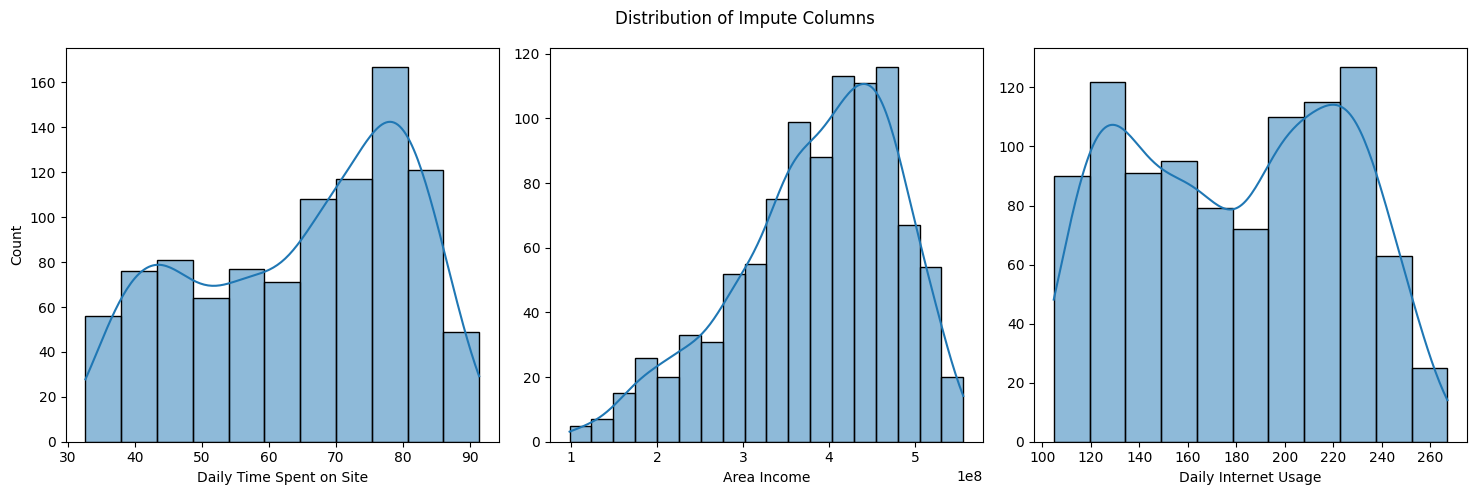

In [10]:
# Checking distribution in columns with missing value for proper imputation method
impute_col = ['Daily Time Spent on Site', 'Area Income', 'Daily Internet Usage']

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Plot histograms for each column
for i, col in enumerate(impute_col):
    sns.histplot(data=df, x=col, kde=True, ax=ax[i])
    if i != 0:
        ax[i].set_ylabel(None)

plt.suptitle('Distribution of Impute Columns')
plt.tight_layout()
plt.show()

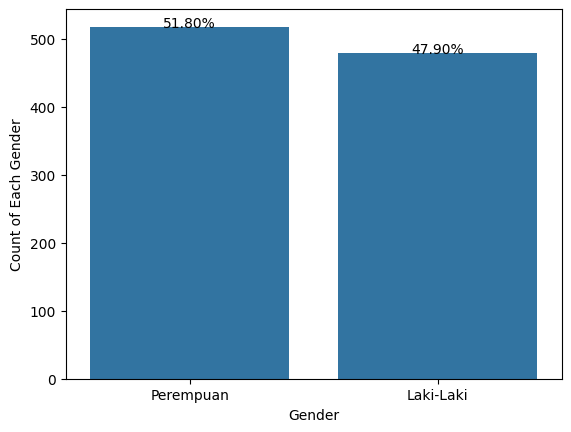

In [11]:
ax = sns.countplot(data=df, x='Gender')

# Calculate the percentage for each category
total = float(len(df))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 0.1,
            '{:.2f}%'.format((height / total
                              ) * 100),
            ha="center")
plt.ylabel('Count of Each Gender')
plt.show()

> Imputation method based on distribution :

- Daily Time Spent on Site and Daily Internet Usage : mean
- Area Income : median
- Gender : mode

In [12]:
# Impute missing values
df['Daily Time Spent on Site'] = df['Daily Time Spent on Site'].fillna(df['Daily Time Spent on Site'].mean())
df['Daily Internet Usage'] = df['Daily Internet Usage'].fillna(df['Daily Internet Usage'].mean())
df['Area Income'] = df['Area Income'].fillna(df['Area Income'].median())
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

# EDA

## Statistical Summary

In [13]:
# Numerical columns
nums_summary = df[nums_cols].describe().transpose()
nums_summary['range'] = nums_summary['max'] - nums_summary['min']
nums_summary['coefficient of variation'] = nums_summary['std'] / nums_summary['mean']

nums_summary

count          mean           std          min  \
Daily Time Spent on Site  1000.0  6.492952e+01  1.574127e+01        32.60   
Age                       1000.0  3.600900e+01  8.785562e+00        19.00   
Area Income               1000.0  3.850493e+08  9.347971e+07  97975500.00   
Daily Internet Usage      1000.0  1.798636e+02  4.362795e+01       104.78   

                                   25%           50%           75%  \
Daily Time Spent on Site  5.154500e+01  6.778000e+01  7.835250e+01   
Age                       2.900000e+01  3.500000e+01  4.200000e+01   
Area Income               3.298201e+08  3.990683e+08  4.566932e+08   
Daily Internet Usage      1.390175e+02  1.810650e+02  2.182875e+02   

                                   max         range  coefficient of variation  
Daily Time Spent on Site  9.143000e+01  5.883000e+01                  0.242436  
Age                       6.100000e+01  4.200000e+01                  0.243982  
Area Income               5.563936e+08  4.584181e+08                  0.242773  
Daily Internet Usage      2.670100e+02  1.622300e+02                  0.242561

In [14]:
# Categorical columns
cats_summary = df[cats_cols].describe().transpose()

cats_summary['bottom'] = [df[col].value_counts().idxmin() for col in cats_cols]
cats_summary['freq_bottom'] = [df[col].value_counts().min() for col in cats_cols]

cats_summary

count unique                            top freq  \
Gender         1000      2                      Perempuan  521   
City           1000     30                       Surabaya   64   
Province       1000     16  Daerah Khusus Ibukota Jakarta  253   
Category       1000     10                       Otomotif  112   
Clicked on Ad  1000      2                             No  500   

                         bottom  freq_bottom  
Gender                Laki-Laki          479  
City                     Serang           11  
Province       Kalimantan Barat           12  
Category                   Bank           90  
Clicked on Ad                No          500

In [15]:
# Date columns
df[date_cols].describe().transpose()

dates_summary = df[date_cols].describe().transpose()
dates_summary['date_data_range'] = dates_summary['max'] - dates_summary['min']

dates_summary

count                        mean                  min  \
Visit Time  1000  2016-04-10 10:33:36.840000  2016-01-01 02:52:00   

                            25%                  50%                  75%  \
Visit Time  2016-02-18 02:55:15  2016-04-07 17:27:00  2016-05-31 03:18:00   

                            max    date_data_range  
Visit Time  2016-07-24 00:22:00  204 days 21:30:00

The data extracted for analysis are only around 6 months, nearly 7.

## Univariate Analysis

### Numerical

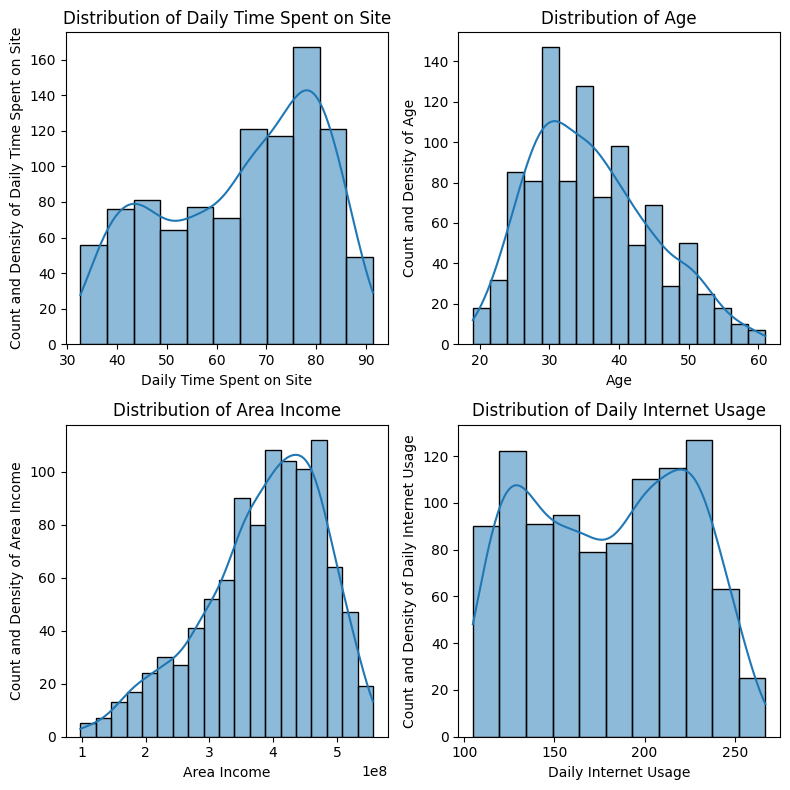

In [16]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
ax = ax.flatten()

for i, col in enumerate(nums_cols) :
    sns.histplot(data=df, x=col, ax=ax[i], kde=True)
    ax[i].set_title(f'Distribution of {col}')
    ax[i].set_ylabel(f'Count and Density of {col}')
    ax[i].set_xlabel(f'{col}')

plt.tight_layout()
plt.show()

In [17]:
# Distribution categorization
from scipy.stats import skew
from scipy.stats import kurtosis

skew_type_list = []
skew_val_list = []
kurtosis_val_list = []

for column in nums_cols :
    data = df[column]
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)

    mean = round(data.mean(), 3)
    median = data.median()
    mode = data.mode()[0]

    skew_val = round(skew(data, nan_policy="omit"),3)
    kurtosis_val = round(kurtosis(data, nan_policy="omit"),3)

    # Distribution conditions for normal and skewed
    if (mean == median == mode) or (-0.2 < skew_val < 0.2):
        skew_type = "Normal Distribution (Symmetric)"
    elif mean < median < mode:
        skew_type = "Negatively Skewed"
        if skew_val <= -1:
            skew_type = "Highly Negatively Skewed"
        elif -0.5 >= skew_val > -1:
            skew_type = "Moderately Negatively Skewed"
        else :
            skew_type = "Moderately Normal Distribution (Symmetric)"
    else:
        skew_type = "Positively Skewed"
        if skew_val >= 1:
            skew_type = "Highly Positively Skewed"
        elif 0.5 <= skew_val < 1:
            skew_type = "Moderately Positively Skewed"
        else :
            skew_type = "Moderately Normal Distribution (Symmetric)"

    skew_type_list.append(skew_type)
    skew_val_list.append(skew_val)
    kurtosis_val_list.append(kurtosis_val)
            
dist = pd.DataFrame({
    "Column Name":nums_cols,
    "Skewness": skew_val_list,
    "Kurtosis": kurtosis_val_list,
    "Type of Distribution": skew_type_list
})

# Distribution conditions for uniform and bimodal
dist.loc[dist['Column Name'].isin(['Daily Internet Usage', 'Daily Time Spent on Site']), 'Type of Distribution'] = 'Uniform Distribution'
dist.loc[dist['Column Name'].isin(['Column Name']), 'Type of Distribution'] = 'Bimodal Distribution'

dist

Column Name  Skewness  Kurtosis  \
0  Daily Time Spent on Site    -0.372    -1.074   
1                       Age     0.478    -0.405   
2               Area Income    -0.653    -0.079   
3      Daily Internet Usage    -0.032    -1.258   

                         Type of Distribution  
0                        Uniform Distribution  
1  Moderately Normal Distribution (Symmetric)  
2  Moderately Normal Distribution (Symmetric)  
3                        Uniform Distribution

Distribution types of each numerical column can be seen in above dataframe, that is almost all of them are categorized as normal distribution. 

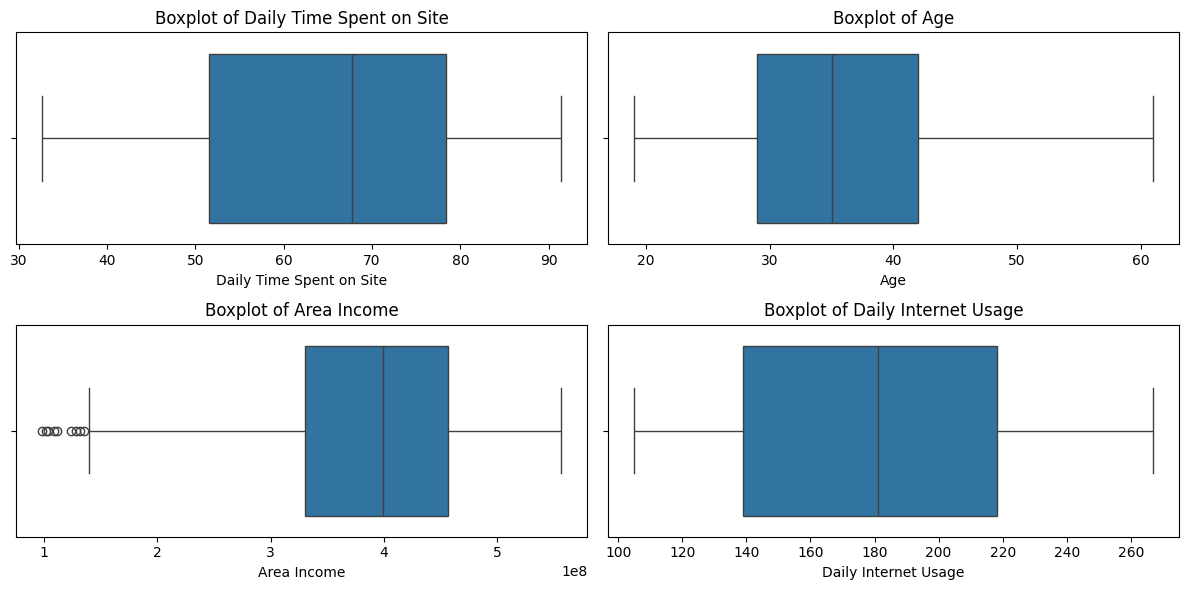

In [18]:
# Boxplot
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 6))
ax = ax.flatten()

for i, col in enumerate(nums_cols) :
    sns.boxplot(data=df, ax=ax[i], x=col)
    ax[i].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

In [19]:
# Outlier detection for original data

print(f'')
print(f'Amount of Rows: {len(df)}')

outlier = []
no_outlier = []
is_outlier = []
low_bound = []
high_bound = []

filtered_entries = np.array([True] * len(df))

for col in nums_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (IQR * 1.5)
    upper_bound = Q3 + (IQR * 1.5)

    filter_outlier = ((df[col] >= lower_bound) & (df[col] <= upper_bound))

    outlier.append(len(df[~filter_outlier]))
    no_outlier.append(len(df[filter_outlier]))
    is_outlier.append(df[col][~filter_outlier].any())
    low_bound.append(lower_bound)
    high_bound.append(upper_bound)

    filtered_entries = ((df[col] >= lower_bound) & (df[col] <= upper_bound)) & filtered_entries

print(f'Amount of Outlier Rows : {len(df[~filtered_entries])}')
print(f'Amount of Non-Outlier Rows : {len(df[filtered_entries])}')
print(f'Percentage of Outliers : {round(len(df[~filtered_entries]) / len(df) * 100, 2)}')
print()

percentage_outlier = np.array(outlier) / len(df) * 100
check_outliers = pd.DataFrame({
    'Column Name':nums_cols,
    'Outlier Exist': is_outlier,
    'Lower Limit': low_bound,
    'Upper Limit': high_bound,
    'Outlier Data': outlier,
    'Non-Outlier Data': no_outlier,
    'Percentage of Outlier': percentage_outlier
})

check_outliers


Amount of Rows: 1000
Amount of Outlier Rows : 9
Amount of Non-Outlier Rows : 991
Percentage of Outliers : 0.9



Column Name  Outlier Exist   Lower Limit   Upper Limit  \
0  Daily Time Spent on Site          False  1.133375e+01  1.185637e+02   
1                       Age          False  9.500000e+00  6.150000e+01   
2               Area Income           True  1.395105e+08  6.470028e+08   
3      Daily Internet Usage          False  2.011250e+01  3.371925e+02   

   Outlier Data  Non-Outlier Data  Percentage of Outlier  
0             0              1000                    0.0  
1             0              1000                    0.0  
2             9               991                    0.9  
3             0              1000                    0.0

### Categorical

In [20]:
cats_cols

['Gender', 'City', 'Province', 'Category', 'Clicked on Ad']

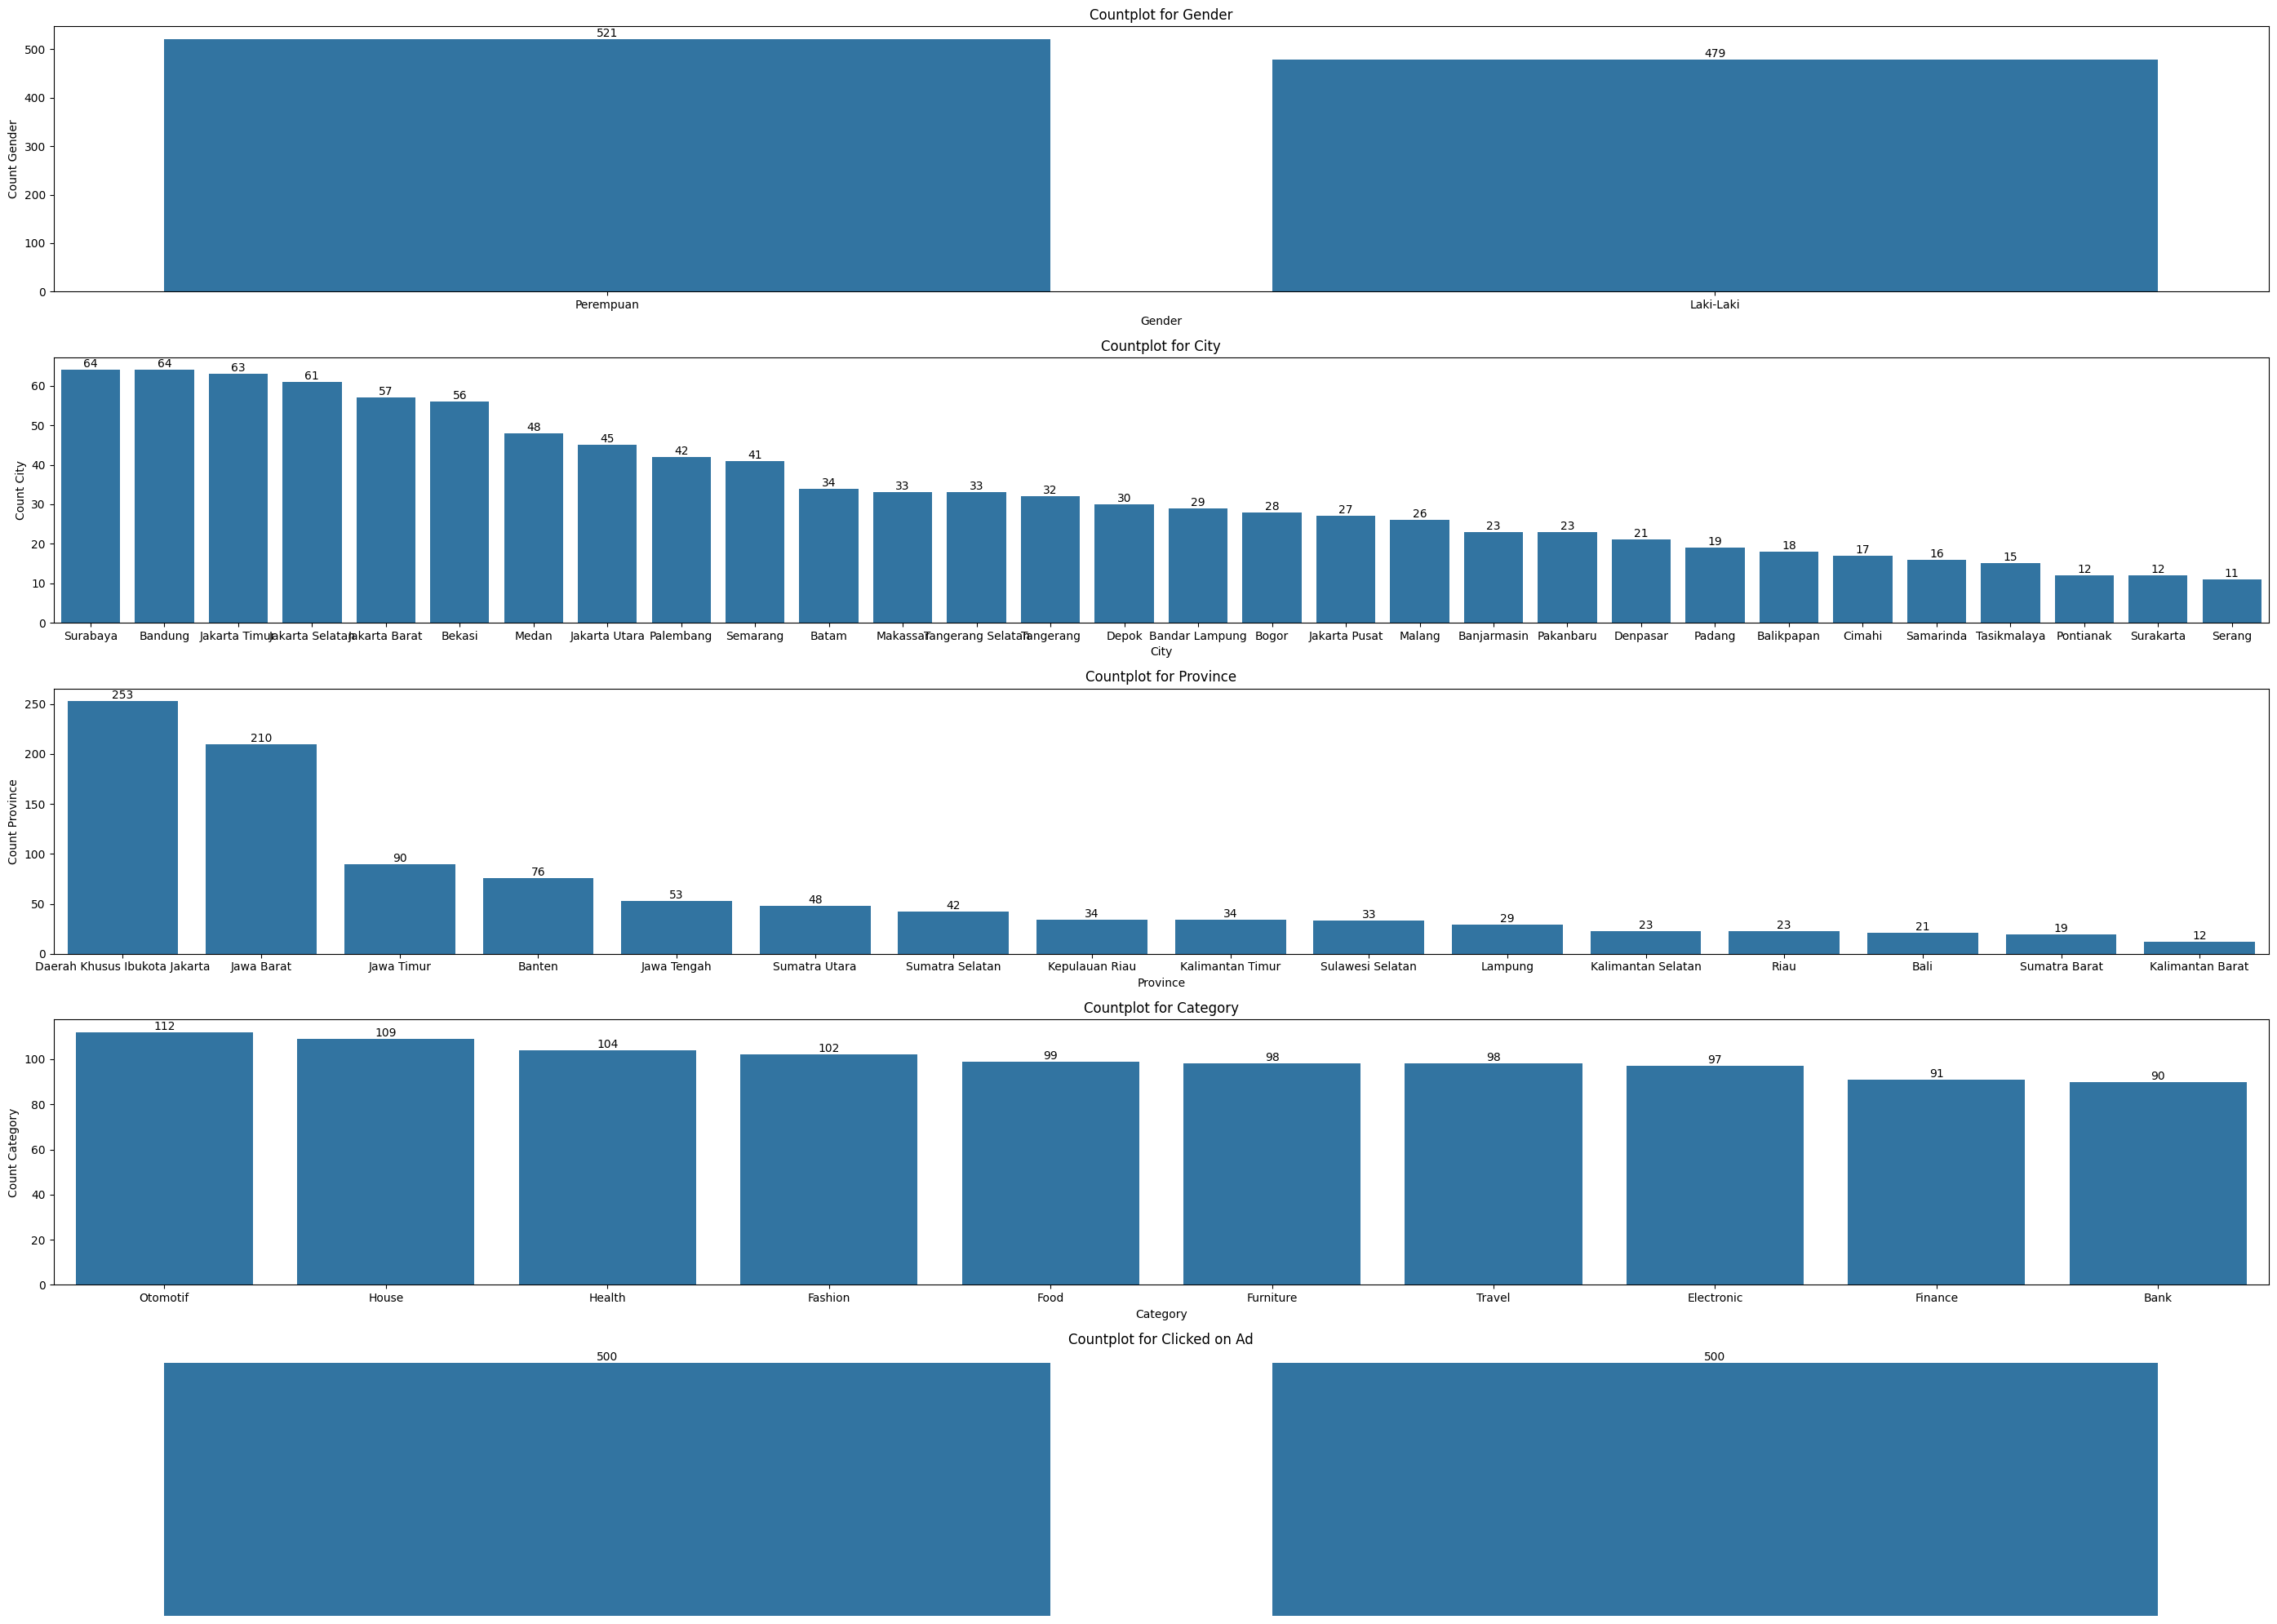

In [21]:
# Categorical Countplot
fig, ax = plt.subplots(nrows=5, ncols=1, figsize=(28, 20))
ax = ax.flatten()

for i, col in enumerate(cats_cols):
    sns.countplot(data=df, x=col, ax=ax[i], order=df[col].value_counts().index)
    ax[i].set_title(f'Countplot for {col}')
    ax[i].set_ylabel(f'Count {col}')
    ax[i].tick_params(axis='x')
    ax[i].bar_label(ax[i].containers[0])

ax[-1].axis('off')
plt.tight_layout()
plt.show()

## Bivariate Analysis

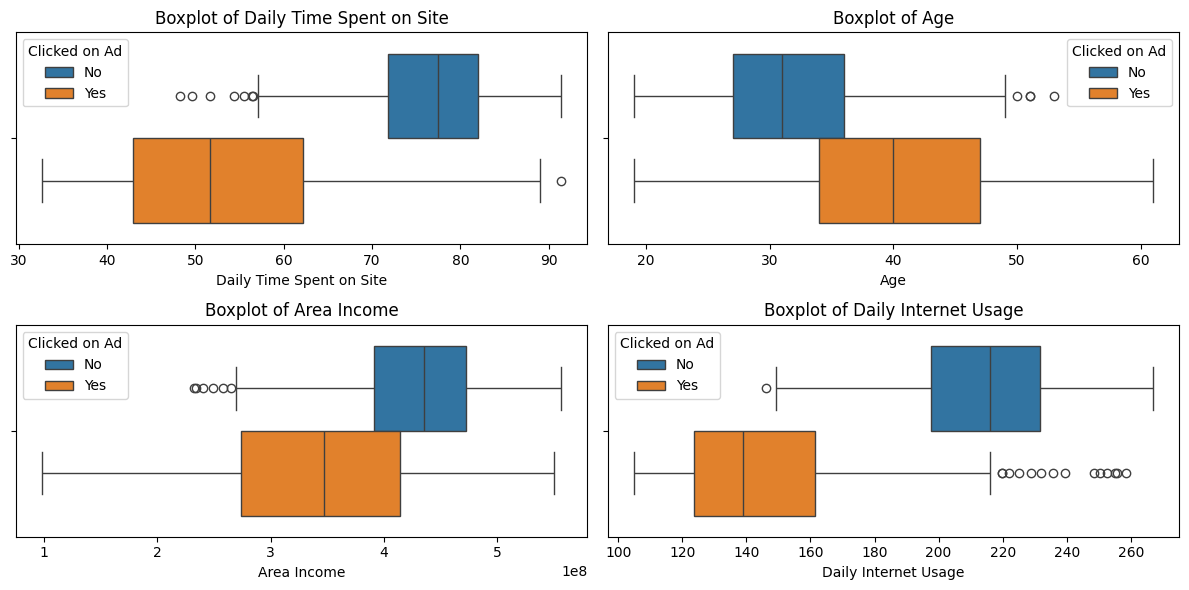

In [22]:
# Boxplot with hue target
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 6))
ax = ax.flatten()

for i, col in enumerate(nums_cols) :
    sns.boxplot(data=df, ax=ax[i], x=col, hue='Clicked on Ad')
    ax[i].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

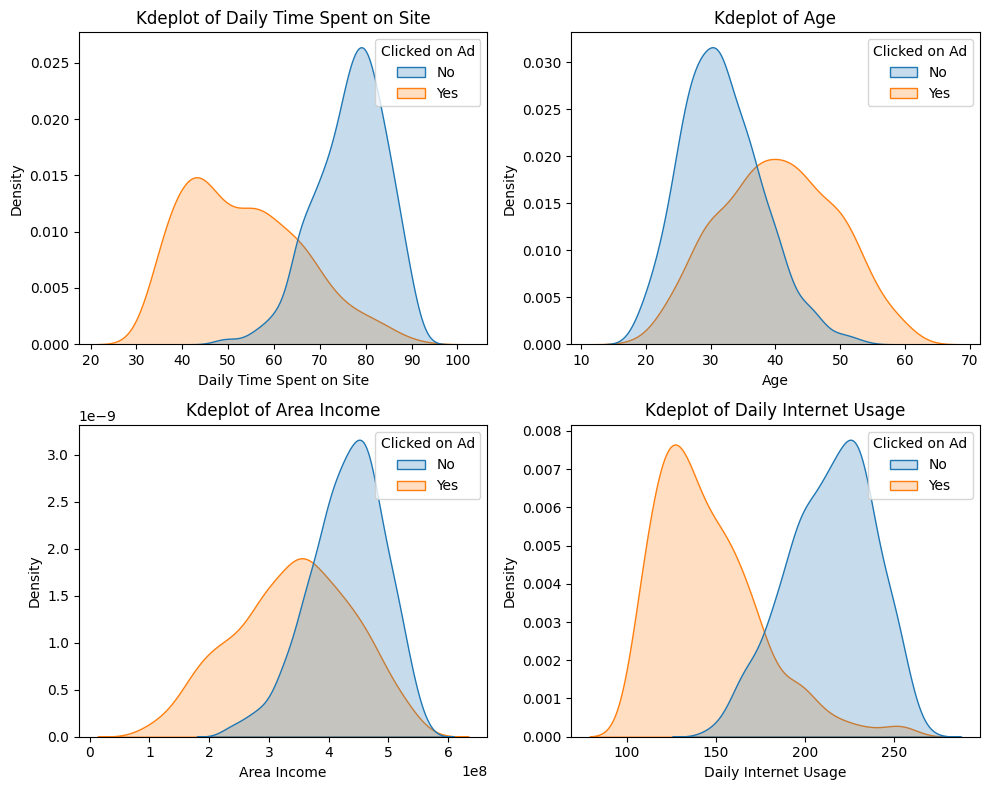

In [23]:
# Kdeplot with hue target
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
ax = ax.flatten()

for i, col in enumerate(nums_cols) :
    sns.kdeplot(data=df, ax=ax[i], x=col, hue='Clicked on Ad', fill=True)
    ax[i].set_title(f'Kdeplot of {col}')

plt.tight_layout()
plt.show()

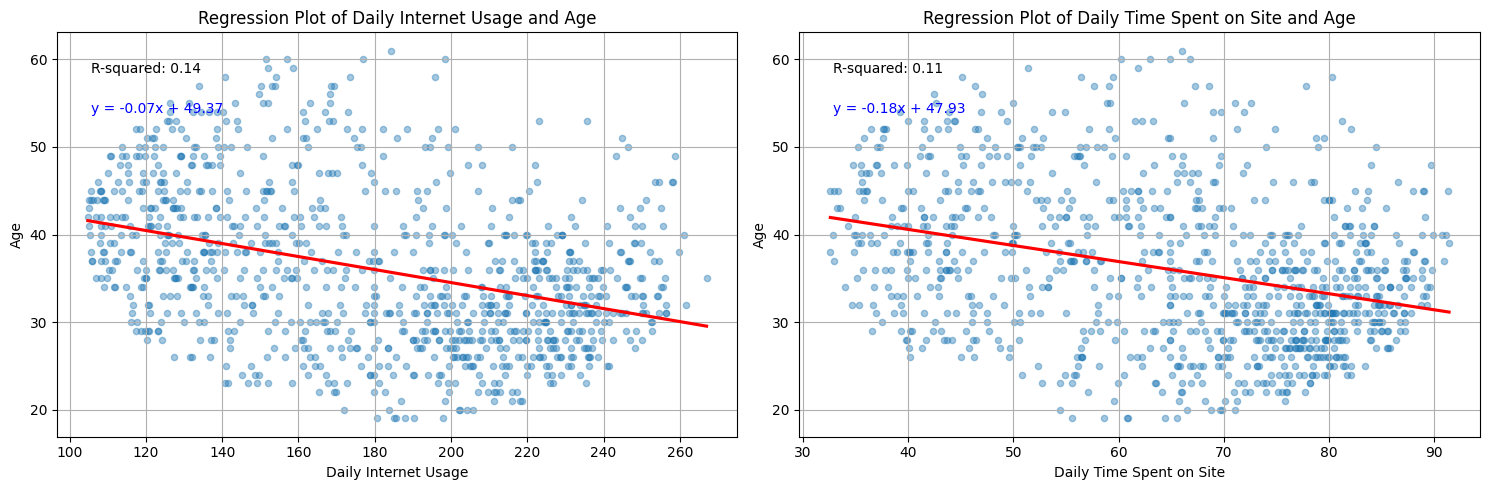

In [24]:
# Regplot of CVR vs Age, Daily Internet Usage, and Daily Time Spent on Site

# Function to calculate R-squared
def calculate_r_squared(x, y, y_pred):
    ss_residual = np.sum((y - y_pred) ** 2)
    ss_total = np.sum((y - np.mean(y)) ** 2)
    r_squared = 1 - (ss_residual / ss_total)
    return r_squared

included_col = ['Daily Internet Usage', 'Daily Time Spent on Site']

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
ax = ax.flatten()

for i, col in enumerate(included_col):
    # Regression plot
    sns.regplot(data=df, ax=ax[i], x=col, y='Age', scatter_kws={'s':20, 'alpha':0.4}, line_kws={'color':'red'}, ci=False)
    ax[i].set_title(f'Regression Plot of {col} and Age')

    # Calculating and displaying R-squared
    x = df[col]
    y = df['Age']
    slope, intercept = np.polyfit(x, y, 1)
    y_pred = slope * x + intercept
    r_squared = calculate_r_squared(x, y, y_pred)
    ax[i].text(0.05, 0.9, f'R-squared: {r_squared:.2f}', transform=ax[i].transAxes)

    # Displaying regression equation
    ax[i].annotate(f'y = {slope:.2f}x + {intercept:.2f}', xy=(0.05, 0.8), xycoords='axes fraction', fontsize=10, color='blue')

    ax[i].grid(True)
    
plt.tight_layout()
plt.show()

- A low R-squared value (close to 0) suggests that the independent variable(s) does not explain much of the variability in the dependent variable, indicating a weak relationship.
- An R-squared value around 0.11 could be considered a weak to modest relationship.

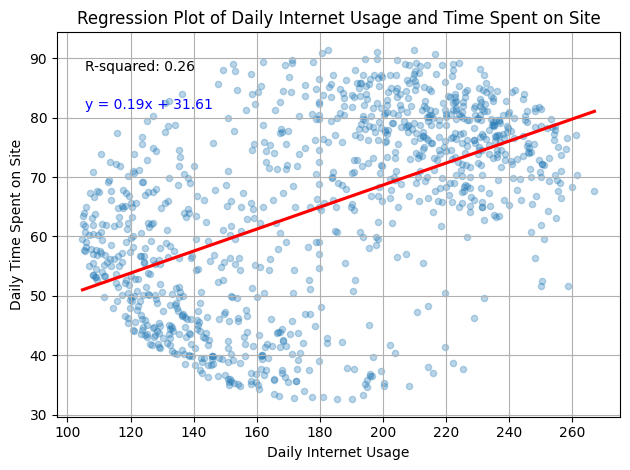

In [25]:
# Regplot of Daily Internet Usage  Daily and Time Spent on Site

# Function to calculate R-squared
def calculate_r_squared(x, y, y_pred):
    ss_residual = np.sum((y - y_pred) ** 2)
    ss_total = np.sum((y - np.mean(y)) ** 2)
    r_squared = 1 - (ss_residual / ss_total)
    return r_squared

regplot = sns.regplot(data=df, x='Daily Internet Usage', y='Daily Time Spent on Site', scatter_kws={'s':20, 'alpha':0.3}, line_kws={'color':'red'}, ci=False)

# Calculating and displaying R-squared
x = df['Daily Internet Usage']
y = df['Daily Time Spent on Site']
slope, intercept = np.polyfit(x, y, 1)
y_pred = slope * x + intercept
r_squared = calculate_r_squared(x, y, y_pred)

plt.text(0.05, 0.9, f'R-squared: {r_squared:.2f}', transform=regplot.transAxes)
plt.annotate(f'y = {slope:.2f}x + {intercept:.2f}', xy=(0.05, 0.8), xycoords='axes fraction', fontsize=10, color='blue')
plt.title(f'Regression Plot of Daily Internet Usage and Time Spent on Site')
plt.grid(True)
    
plt.tight_layout()
plt.show()

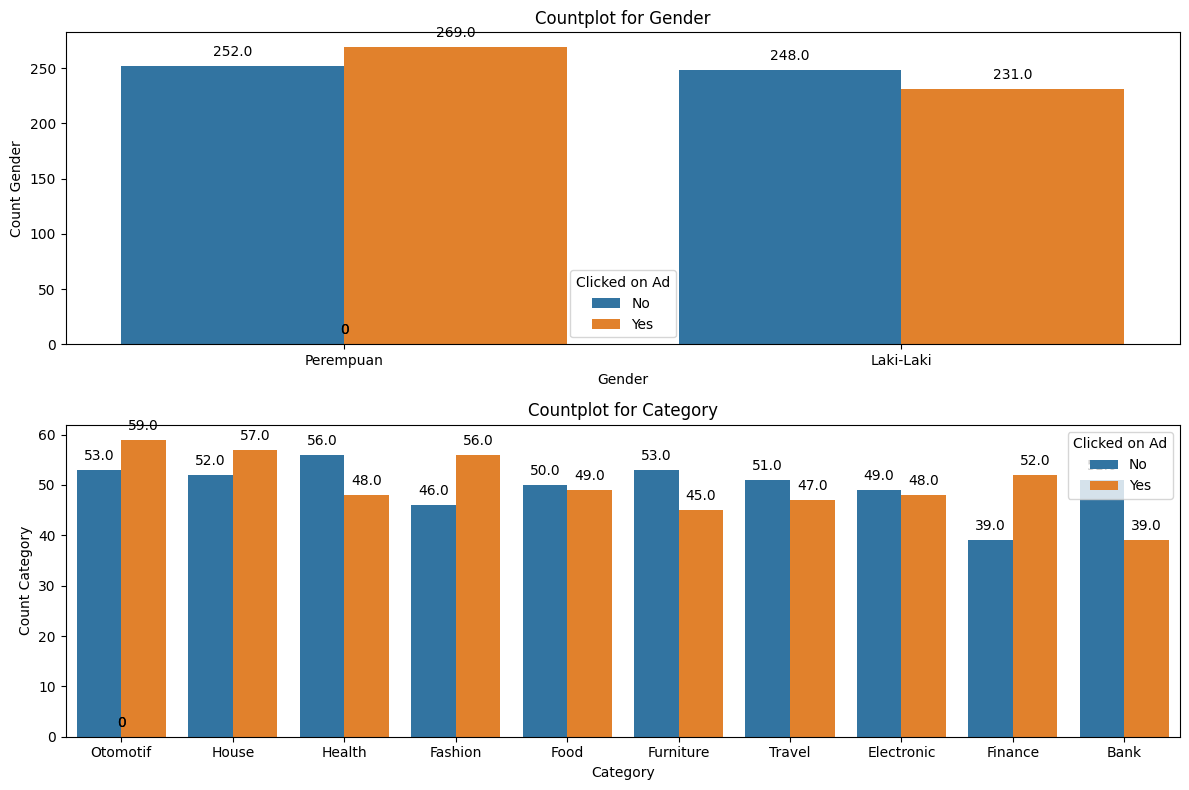

In [26]:
# Categorical Countplot with hue target (only for gender and category)
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))
ax = ax.flatten()

cats_cols_few = ['Gender', 'Category']

for i, col in enumerate(cats_cols_few):
    sns.countplot(data=df, x=col, ax=ax[i], order=df[col].value_counts().index, hue='Clicked on Ad')
    ax[i].set_title(f'Countplot for {col}')
    ax[i].set_ylabel(f'Count {col}')
    ax[i].tick_params(axis='x')
    
    # Adding annotations on top of each bar
    for p in ax[i].patches:
        ax[i].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()

There is not much difference between clicked and not cliked on the advertisement.

## Multivariate Analysis

As we have seen from the regression plot before that the numerical distribution is not linear, so we use method of calculating the correlation that can capture non-linear relationship better.

**Reminder About Correlation Method**

If you have a non-linear distribution of your numerical features, using Pearson correlation may not capture the full extent of the relationship between variables because Pearson correlation measures linear relationships. In such cases, Spearman and Kendall correlations can be more appropriate alternatives as they are non-parametric measures and can capture monotonic relationships, which may better reflect non-linear associations.

Here's a brief overview of each correlation method and its suitability for different types of relationships:

1. **Pearson Correlation**:
   - Measures the linear relationship between two continuous variables.
   - Assumes that variables are normally distributed and have a linear relationship.
   - Sensitive to outliers.
   - Suitable for linear relationships.

2. **Spearman Correlation**:
   - Measures the strength and direction of monotonic relationships between two continuous or ordinal variables.
   - Does not assume linearity.
   - More robust to outliers compared to Pearson correlation.
   - Suitable for non-linear relationships.

3. **Kendall Correlation**:
   - Measures the strength and direction of ordinal relationships between two variables.
   - Does not assume linearity.
   - Less affected by outliers compared to Pearson correlation.
   - Suitable for non-linear relationships, especially when the data is ranked or ordinal.

In summary, if you suspect that your data has non-linear relationships, it's advisable to calculate both Spearman and Kendall correlations in addition to Pearson correlation to capture different aspects of the relationships. This allows you to have a more comprehensive understanding of the associations between variables. Additionally, visual exploration through scatter plots or other graphical techniques can also provide insights into the nature of the relationships between variables.

Text(0.5, 1.0, 'Spearman Correlation')

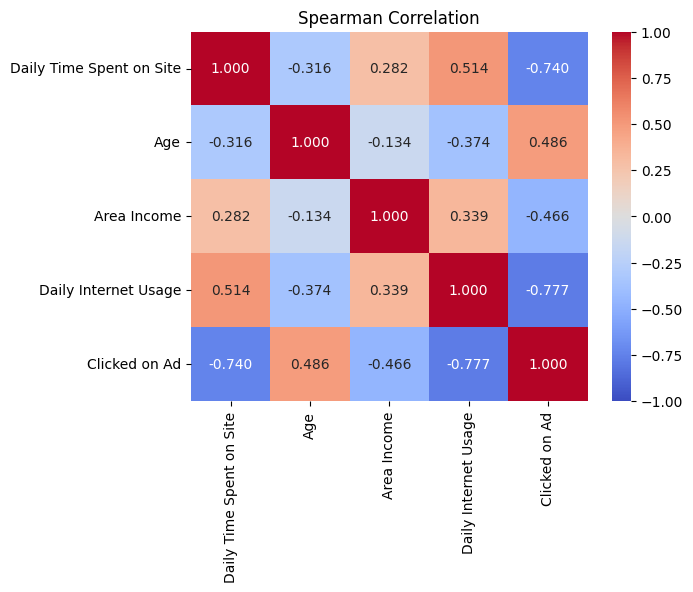

In [27]:
# Heatmap of numerical values (Spearman method)
df['Clicked on Ad'] = df['Clicked on Ad'].replace({'No' : 0, # Quick label encoding for target
                                                   'Yes' : 1})

fig, ax = plt.subplots()
sns.heatmap(data=df.corr(method='spearman', numeric_only=True),annot=True, cmap='coolwarm', fmt='.3f', vmin=-1, vmax=1)
plt.title('Spearman Correlation')

Text(0.5, 1.0, 'Kendall Correlation')

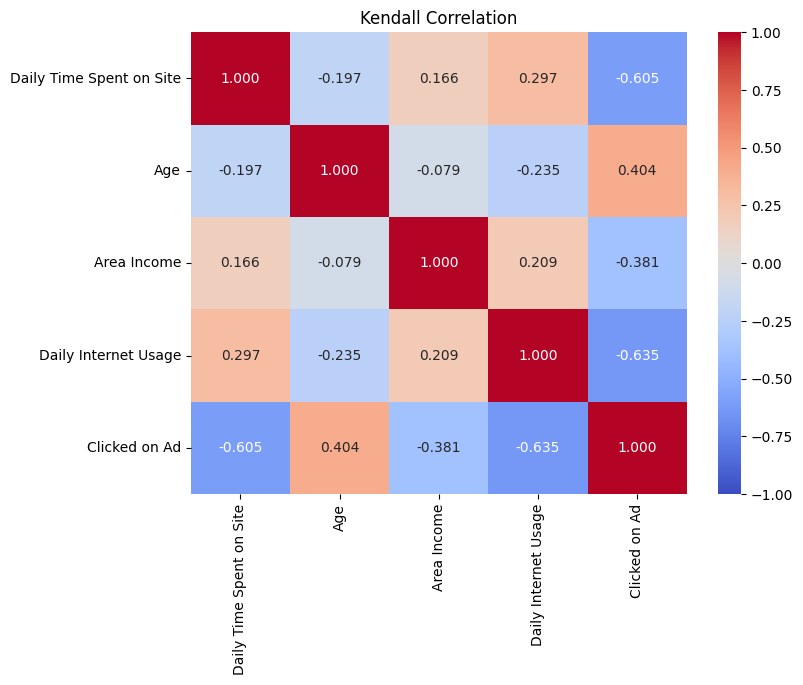

In [28]:
# Heatmap of numerical values (Kendall method)
plt.figure(figsize=(8,6))
sns.heatmap(data=df.corr(method='kendall', numeric_only=True),annot=True, cmap='coolwarm', fmt='.3f', vmin=-1, vmax=1)
plt.title('Kendall Correlation')

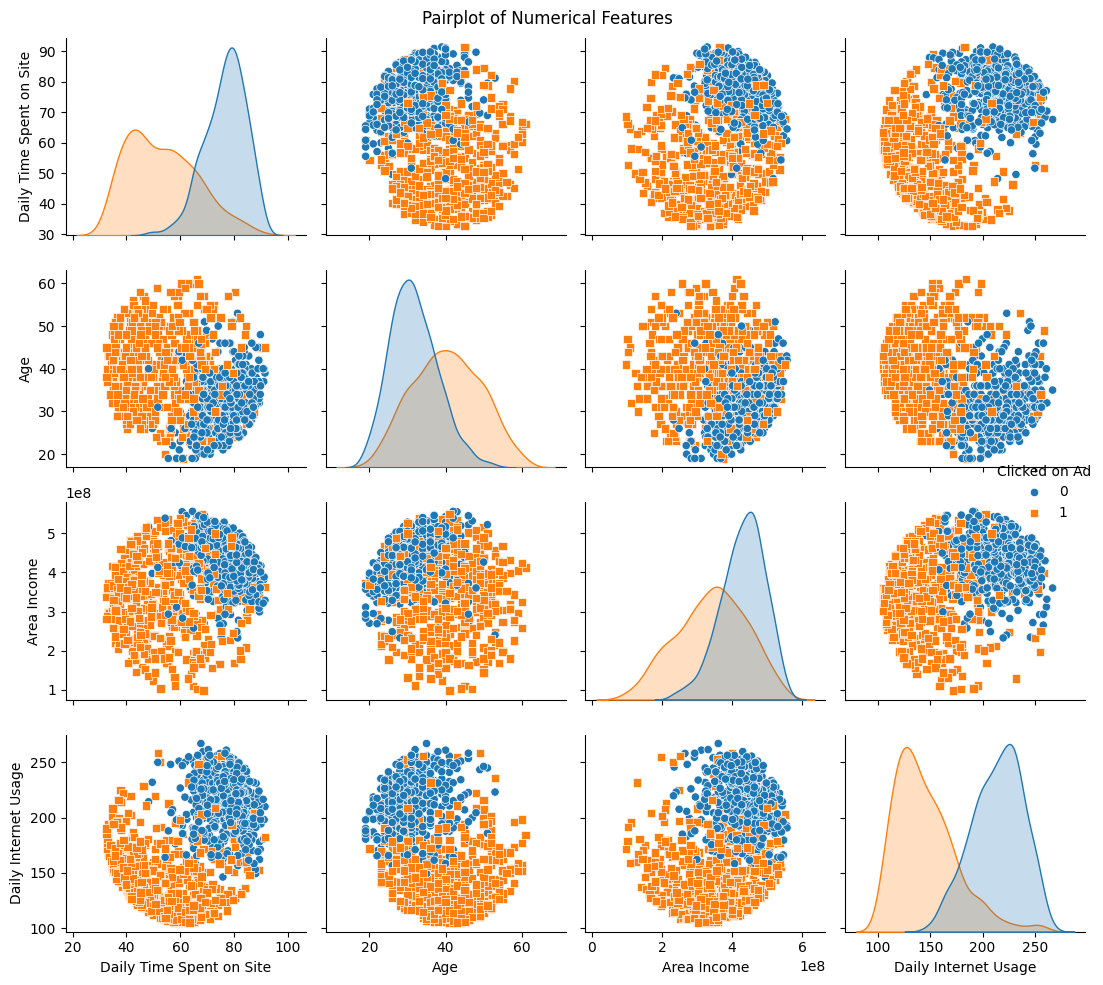

In [29]:
# Pairplot of numerical features
sns.pairplot(data=df, diag_kind='kde', hue='Clicked on Ad', markers=['o', 's'])
plt.suptitle('Pairplot of Numerical Features')
plt.tight_layout()
plt.show()

This is quite an interesting segmentation of target variable. One of them that the values distribution is not linear.

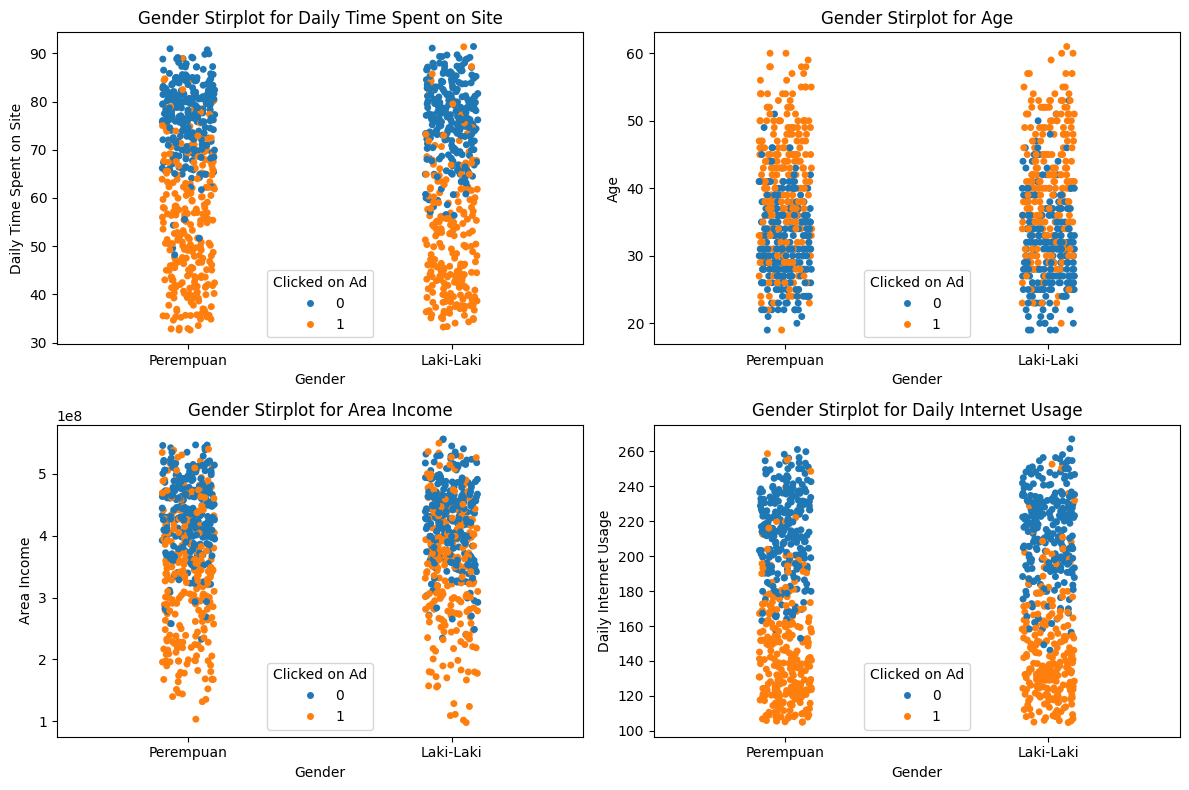

In [30]:
# Stripplot for Gender
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
ax = ax.flatten()

for i, col in enumerate(nums_cols):
    sns.stripplot(data=df, ax=ax[i], x='Gender', y=col, hue='Clicked on Ad')    
    ax[i].set_title(f'Gender Stirplot for {col}')

plt.tight_layout()
plt.show()

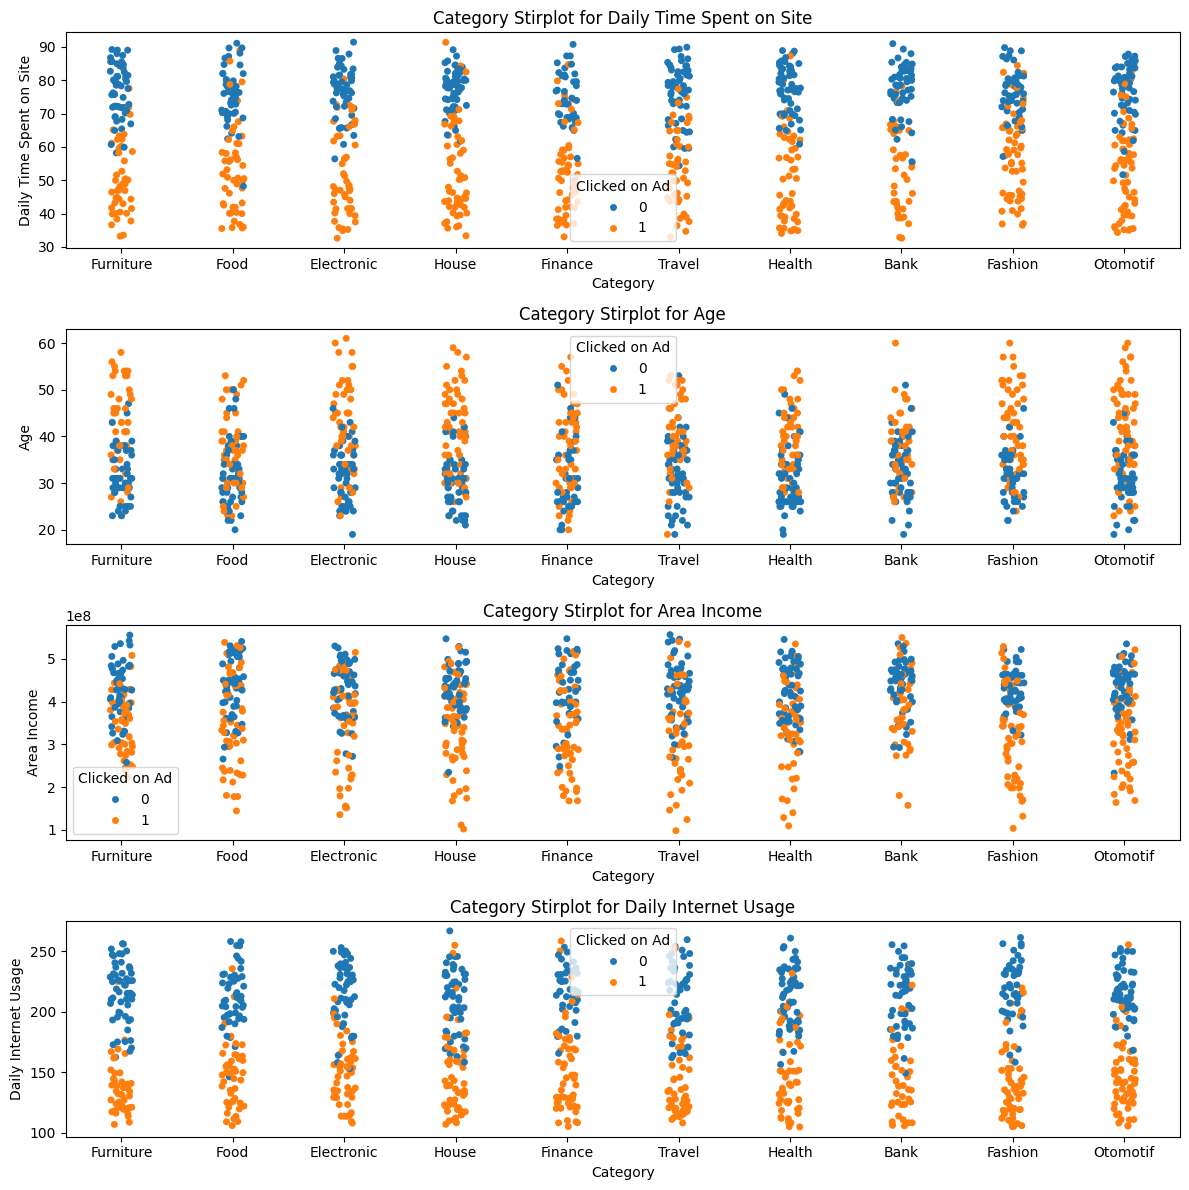

In [31]:
# Stripplot for Category
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(12, 12))
ax = ax.flatten()

for i, col in enumerate(nums_cols):
    sns.stripplot(data=df, ax=ax[i], x='Category', y=col, hue='Clicked on Ad')    
    ax[i].set_title(f'Category Stirplot for {col}')
    # ax[i].legend().remove()

plt.tight_layout()
plt.show()

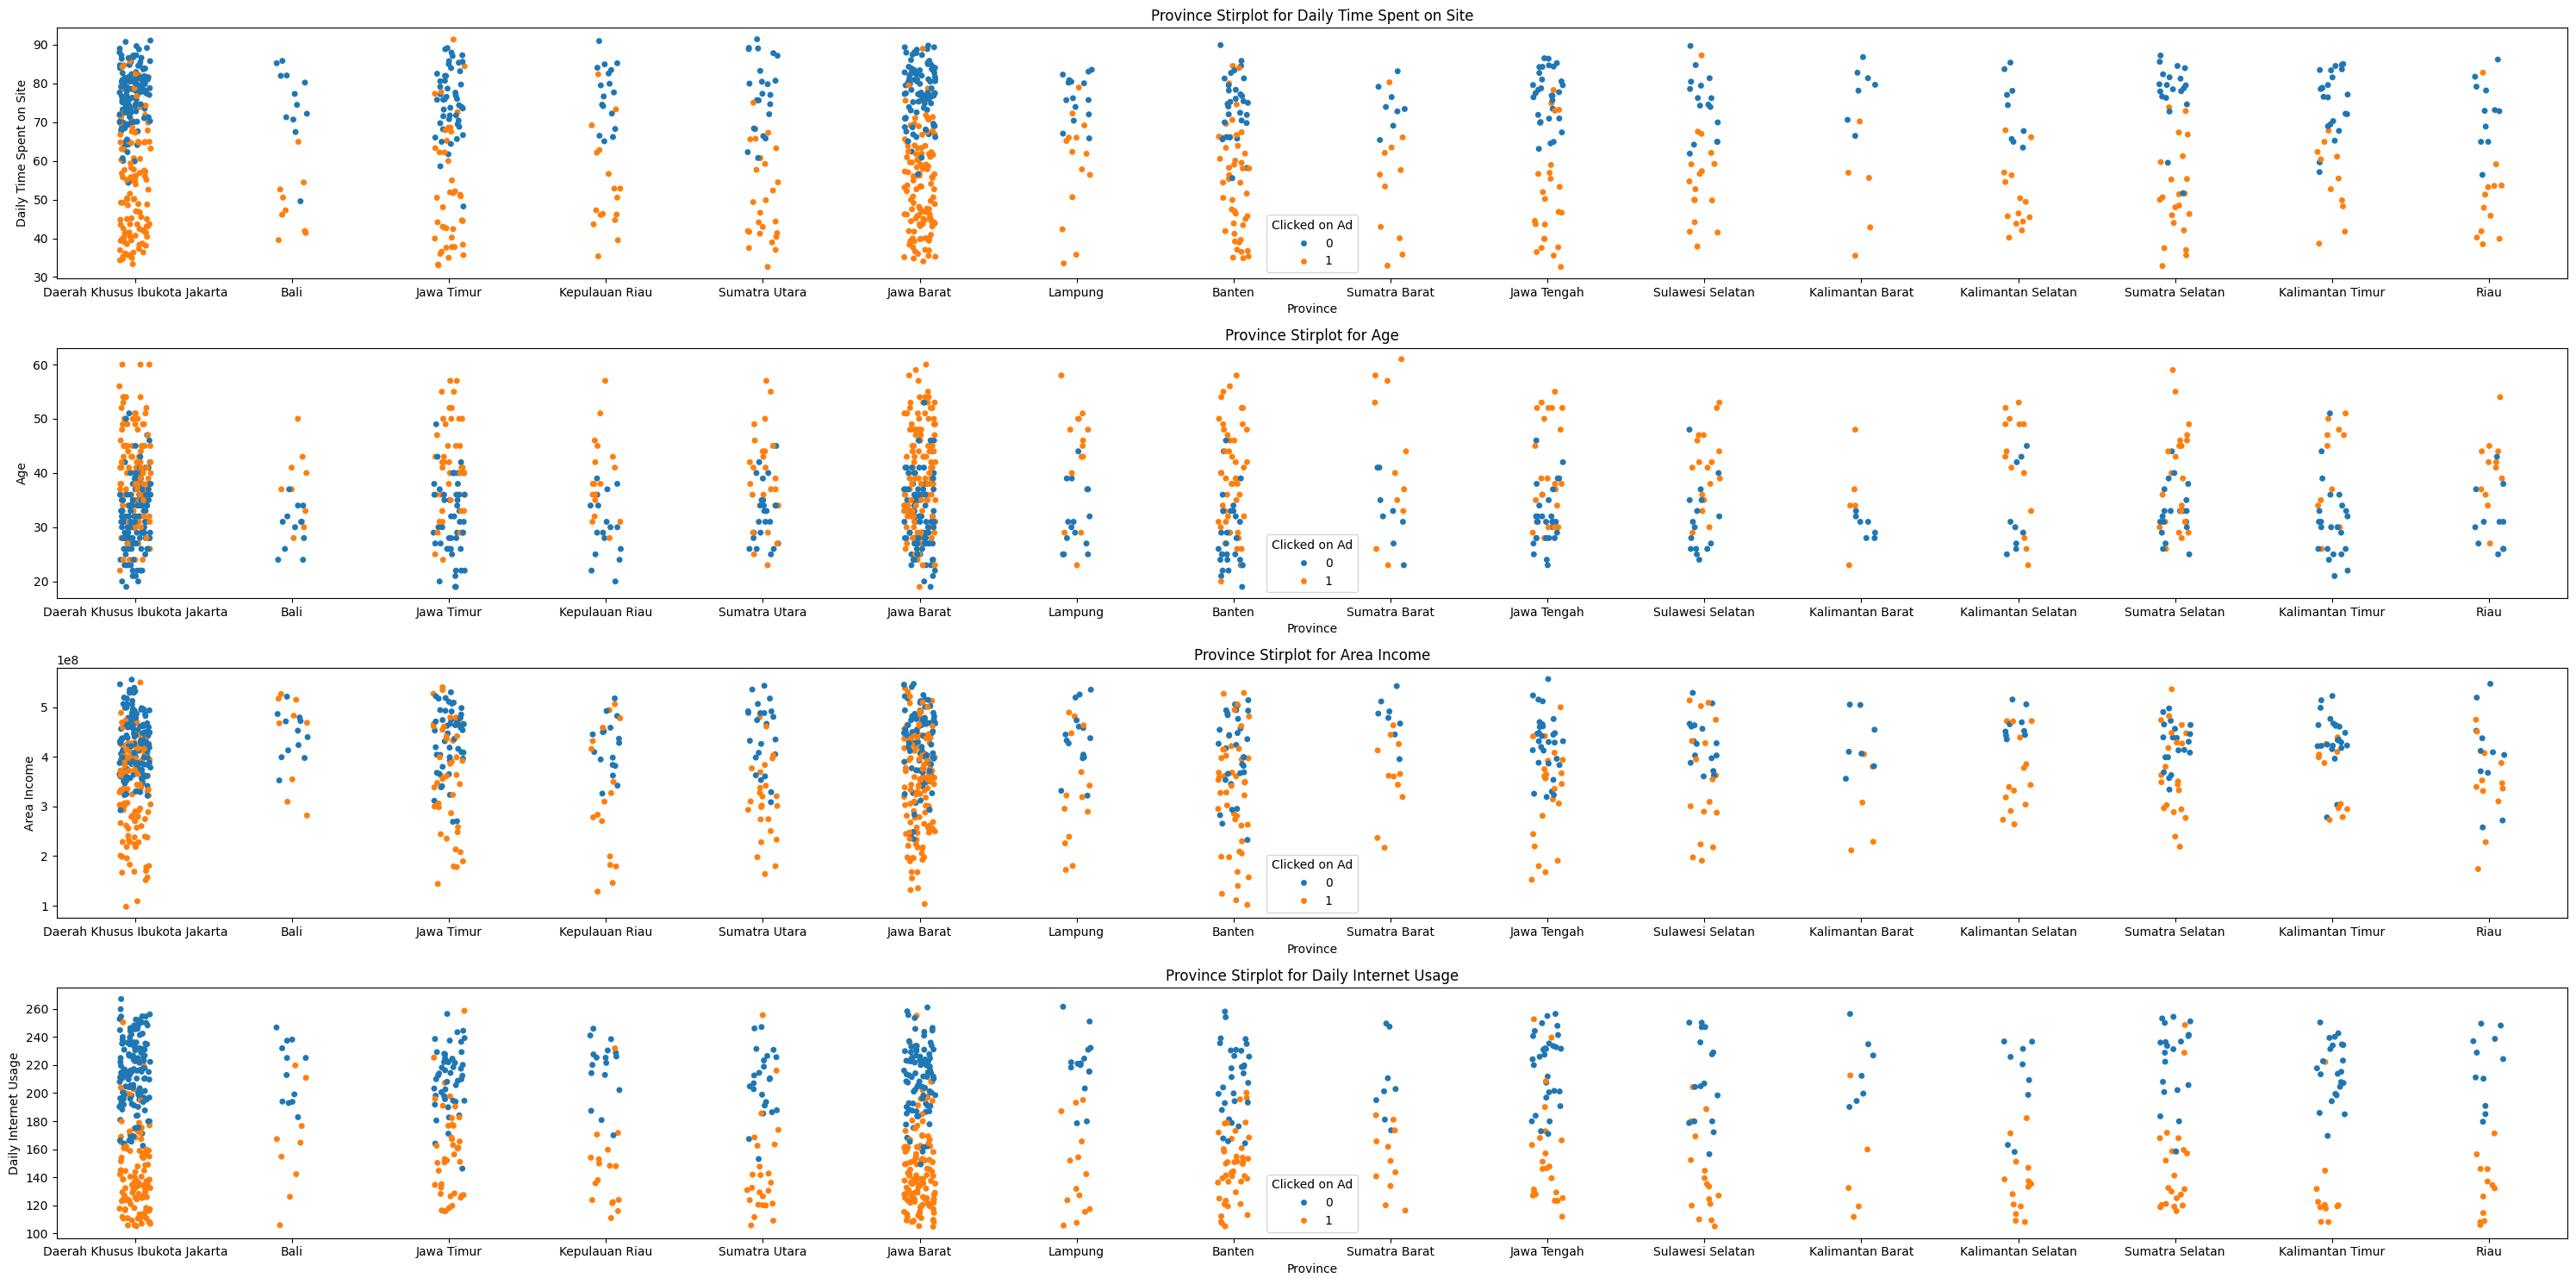

In [32]:
# Stripplot for Province
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(30, 15))
ax = ax.flatten()

for i, col in enumerate(nums_cols):
    sns.stripplot(data=df, ax=ax[i], x='Province', y=col, hue='Clicked on Ad')    
    ax[i].set_title(f'Province Stirplot for {col}')
    # ax[i].legend().remove()

plt.tight_layout()
plt.show()

# Feature Engineering

In [47]:
# Make a copy of original dataframe for preprocessing and encoding process
df_preprocessed = df.copy()
df_preprocessed.sample(5)

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
283                     71.76   35  484999830.0                237.39   
14                      42.95   33  216832000.0                143.56   
986                     76.44   28  419770330.0                232.68   
353                     79.54   44  493448200.0                217.68   
749                     54.35   42  538889470.0                164.02   

        Gender          Visit Time               City  \
283  Perempuan 2016-05-26 13:18:00             Malang   
14   Perempuan 2016-03-24 09:31:00             Padang   
986  Laki-Laki 2016-04-06 17:26:00           Semarang   
353  Laki-Laki 2016-01-05 16:34:00  Tangerang Selatan   
749  Perempuan 2016-06-20 08:22:00      Jakarta Pusat   

                          Province   Category  Clicked on Ad  
283                     Jawa Timur  Furniture              0  
14                   Sumatra Barat       Food              1  
986                    Jawa Tengah   Otomotif              0  
353                         Banten     Health              0  
749  Daerah Khusus Ibukota Jakarta     Travel              0

### Age Group

The `Age Group` column is created by grouping the `Age` column. But first we need check the distribution of age to help with the grouping range.

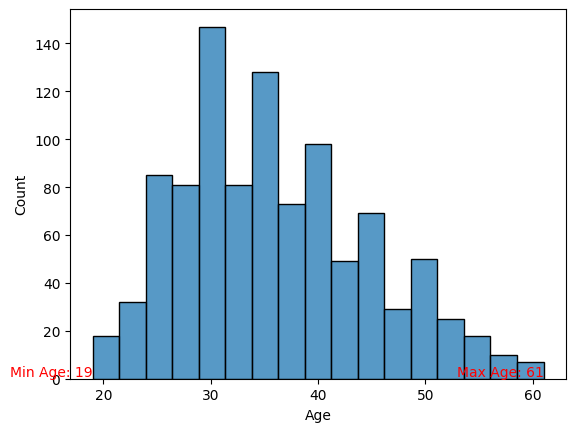

In [48]:
min_age = df_preprocessed['Age'].min()
max_age = df_preprocessed['Age'].max()

sns.histplot(data=df, x='Age')
plt.text(min_age, 0, f'Min Age: {min_age}', ha='right', va='bottom', color='red')
plt.text(max_age, 0, f'Max Age: {max_age}', ha='right', va='bottom', color='red')
plt.show()

In [49]:
# Age Group
def age_grouping(age) :
    if age >= 50 :
        group = 'Senior Adult'
    elif age >= 30 :
        group = 'Middle Adult'
    else :
        group = 'Young Adult'
    return group

df_preprocessed['Age Group'] = df_preprocessed['Age'].apply(age_grouping)

### Area Income Group

The `Area Income Group` column is created by grouping the `Area Income` column. Same as before procedure will be done for this column.

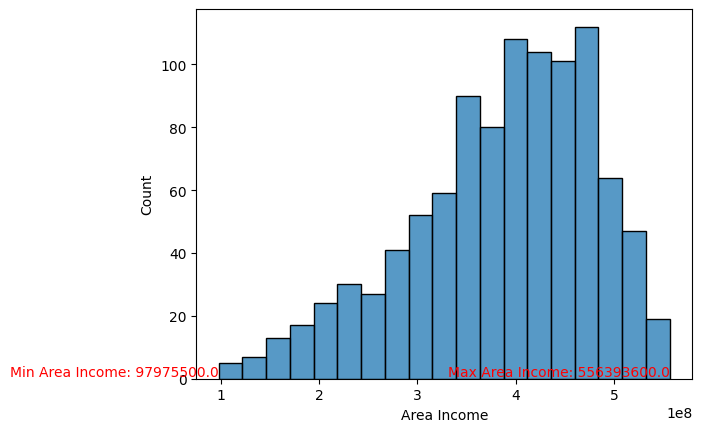

In [50]:
min_age = df_preprocessed['Area Income'].min()
max_age = df_preprocessed['Area Income'].max()

sns.histplot(data=df, x='Area Income')
plt.text(min_age, 0, f'Min Area Income: {min_age}', ha='right', va='bottom', color='red')
plt.text(max_age, 0, f'Max Area Income: {max_age}', ha='right', va='bottom', color='red')
plt.show()

Since the distribution is skewed, we will rely on quantiles for grouping.

In [51]:
q1 = np.percentile(df_preprocessed['Area Income'], 25)
q2 = np.percentile(df_preprocessed['Area Income'], 50)
q3 = np.percentile(df_preprocessed['Area Income'], 75)

def income_grouping(income):
    if income <= q1 :
        group = 'Low Income'
    elif income <= q2 :
        group = 'Medium-Low Income'
    elif income <= q3 :
        group = 'Medium-High Income'
    else :
        group = 'High Income'
    return group

df_preprocessed['Area Income Group'] = df_preprocessed['Area Income'].apply(income_grouping)

### Datetime Components Columns (Month, Day, etc)

In [52]:
df_preprocessed['Visit Time'].describe()

count                          1000
mean     2016-04-10 10:33:36.840000
min             2016-01-01 02:52:00
25%             2016-02-18 02:55:15
50%             2016-04-07 17:27:00
75%             2016-05-31 03:18:00
max             2016-07-24 00:22:00
Name: Visit Time, dtype: object

As we have discovered before that the data only have information of 6/7 months of campaign data. So we won't need to extract the year component.

**Reminder :**

For datetime extraction methods check here : https://pandas.pydata.org/docs/user_guide/timeseries.html#time-date-components

In [53]:
df_preprocessed['Visit Month'] = df_preprocessed['Visit Time'].dt.month
df_preprocessed['Visit Day'] = df_preprocessed['Visit Time'].dt.day
df_preprocessed['Visit Hour'] = df_preprocessed['Visit Time'].dt.hour
df_preprocessed['Is Visit Day Weekend'] = df_preprocessed['Visit Time'].dt.day_of_week.isin([5, 6]).astype(int)

In [54]:
df_preprocessed['Is Visit Day Weekend'].value_counts()

Is Visit Day Weekend
0    715
1    285
Name: count, dtype: int64

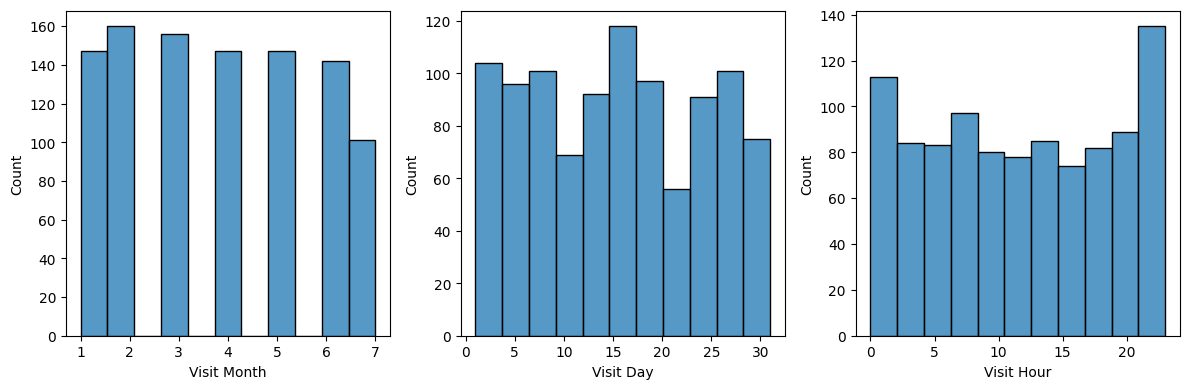

In [55]:
# Datetime component analysis
datetime_cols_analysis = ['Visit Month', 'Visit Day', 'Visit Hour']

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
ax = ax.flatten()

for i, col in enumerate(datetime_cols_analysis) :
    sns.histplot(data=df_preprocessed, ax=ax[i], x=col)

plt.tight_layout()
plt.show()

In [56]:
# Re-check dataframe after feature engineering process
df_preprocessed

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                   68.950000   35  432837300.0                256.09   
1                   80.230000   31  479092950.0                193.77   
2                   69.470000   26  418501580.0                236.50   
3                   74.150000   29  383643260.0                245.89   
4                   68.370000   35  517229930.0                225.58   
..                        ...  ...          ...                   ...   
995                 72.970000   30  499691990.0                208.58   
996                 51.300000   45  474475190.0                134.42   
997                 64.929524   51  296910040.0                120.37   
998                 55.550000   19  293445530.0                187.95   
999                 45.010000   26  209130600.0                178.35   

        Gender          Visit Time           City  \
0    Perempuan 2016-03-27 00:53:00  Jakarta Timur   
1    Laki-Laki 2016-04-04 01:39:00       Denpasar   
2    Perempuan 2016-03-13 20:35:00       Surabaya   
3    Laki-Laki 2016-01-10 02:31:00          Batam   
4    Perempuan 2016-06-03 03:36:00          Medan   
..         ...                 ...            ...   
995  Laki-Laki 2016-02-11 21:49:00       Semarang   
996  Laki-Laki 2016-04-22 02:07:00      Pakanbaru   
997  Laki-Laki 2016-02-01 17:24:00      Samarinda   
998  Perempuan 2016-03-24 02:35:00      Tangerang   
999  Perempuan 2016-06-03 21:43:00         Serang   

                          Province    Category  Clicked on Ad     Age Group  \
0    Daerah Khusus Ibukota Jakarta   Furniture              0  Middle Adult   
1                             Bali        Food              0  Middle Adult   
2                       Jawa Timur  Electronic              0   Young Adult   
3                   Kepulauan Riau       House              0   Young Adult   
4                    Sumatra Utara     Finance              0  Middle Adult   
..                             ...         ...            ...           ...   
995                    Jawa Tengah     Finance              1  Middle Adult   
996                           Riau  Electronic              1  Middle Adult   
997               Kalimantan Timur      Travel              1  Senior Adult   
998                         Banten        Bank              0   Young Adult   
999                         Banten      Travel              1   Young Adult   

      Area Income Group  Visit Month  Visit Day  Visit Hour  \
0    Medium-High Income            3         27           0   
1           High Income            4          4           1   
2    Medium-High Income            3         13          20   
3     Medium-Low Income            1         10           2   
4           High Income            6          3           3   
..                  ...          ...        ...         ...   
995         High Income            2         11          21   
996         High Income            4         22           2   
997          Low Income            2          1          17   
998          Low Income            3         24           2   
999          Low Income            6          3          21   

     Is Visit Day Weekend  
0                       1  
1                       0  
2                       1  
3                       1  
4                       0  
..                    ...  
995                     0  
996                     0  
997                     0  
998                     0  
999                     0  

[1000 rows x 16 columns]

## Feature Encoding

In [57]:
# Re-check the unique values of categorical features to determine encoding technique
encoded_features = ['Gender', 'City', 'Province', 'Category', 'Age Group', 'Area Income Group']

for col in encoded_features :
    print(f'======={col}=======')
    print(df_preprocessed[col].unique())
    print()

=======Gender=======
['Perempuan' 'Laki-Laki']

=======City=======
['Jakarta Timur' 'Denpasar' 'Surabaya' 'Batam' 'Medan' 'Jakarta Barat'
 'Bandung' 'Bandar Lampung' 'Jakarta Pusat' 'Depok' 'Serang' 'Padang'
 'Semarang' 'Makassar' 'Malang' 'Jakarta Utara' 'Pontianak'
 'Jakarta Selatan' 'Tasikmalaya' 'Surakarta' 'Bekasi' 'Tangerang' 'Cimahi'
 'Banjarmasin' 'Palembang' 'Samarinda' 'Pakanbaru' 'Tangerang Selatan'
 'Bogor' 'Balikpapan']

=======Province=======
['Daerah Khusus Ibukota Jakarta' 'Bali' 'Jawa Timur' 'Kepulauan Riau'
 'Sumatra Utara' 'Jawa Barat' 'Lampung' 'Banten' 'Sumatra Barat'
 'Jawa Tengah' 'Sulawesi Selatan' 'Kalimantan Barat' 'Kalimantan Selatan'
 'Sumatra Selatan' 'Kalimantan Timur' 'Riau']

=======Category=======
['Furniture' 'Food' 'Electronic' 'House' 'Finance' 'Travel' 'Health'
 'Bank' 'Fashion' 'Otomotif']

=======Age Group=======
['Middle Adult' 'Young Adult' 'Senior Adult']

=======Area Income Group=======
['Medium-High Income' 'High Income' 'Medium-Low Income' '

In [58]:
# Label encoding for Gender, Age Group, and Area Income Group
df_preprocessed['Gender'] = df_preprocessed['Gender'].replace({'Perempuan' : 0,
                                                                'Laki-Laki' : 1})


df_preprocessed['Age Group'] = df_preprocessed['Age Group'].replace({'Young Adult' : 0,
                                                                    'Middle Adult' : 1,
                                                                    'Senior Adult' : 2})

df_preprocessed['Area Income Group'] = df_preprocessed['Area Income Group'].replace({'Low Income' : 0,
                                                                                    'Medium-Low Income' : 1,
                                                                                    'Medium-High Income' : 2,
                                                                                    'High Income' : 3})

In [59]:
# One-hot encoding for City, Province, and Category
one_hot_columns = ['City', 'Province', 'Category']

for col in one_hot_columns :
    onehots = pd.get_dummies(df_preprocessed[col], prefix=col)
    onehots = onehots.astype(int)
    df_preprocessed = pd.concat([df_preprocessed, onehots], axis=1)

# Drop the original columns after one-hot encoding
df_preprocessed.drop(one_hot_columns, axis=1, inplace=True)

In [60]:
df_preprocessed

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  Gender  \
0                   68.950000   35  432837300.0                256.09       0   
1                   80.230000   31  479092950.0                193.77       1   
2                   69.470000   26  418501580.0                236.50       0   
3                   74.150000   29  383643260.0                245.89       1   
4                   68.370000   35  517229930.0                225.58       0   
..                        ...  ...          ...                   ...     ...   
995                 72.970000   30  499691990.0                208.58       1   
996                 51.300000   45  474475190.0                134.42       1   
997                 64.929524   51  296910040.0                120.37       1   
998                 55.550000   19  293445530.0                187.95       0   
999                 45.010000   26  209130600.0                178.35       0   

             Visit Time  Clicked on Ad  Age Group  Area Income Group  \
0   2016-03-27 00:53:00              0          1                  2   
1   2016-04-04 01:39:00              0          1                  3   
2   2016-03-13 20:35:00              0          0                  2   
3   2016-01-10 02:31:00              0          0                  1   
4   2016-06-03 03:36:00              0          1                  3   
..                  ...            ...        ...                ...   
995 2016-02-11 21:49:00              1          1                  3   
996 2016-04-22 02:07:00              1          1                  3   
997 2016-02-01 17:24:00              1          2                  0   
998 2016-03-24 02:35:00              0          0                  0   
999 2016-06-03 21:43:00              1          0                  0   

     Visit Month  Visit Day  Visit Hour  Is Visit Day Weekend  \
0              3         27           0                     1   
1              4          4           1                     0   
2              3         13          20                     1   
3              1         10           2                     1   
4              6          3           3                     0   
..           ...        ...         ...                   ...   
995            2         11          21                     0   
996            4         22           2                     0   
997            2          1          17                     0   
998            3         24           2                     0   
999            6          3          21                     0   

     City_Balikpapan  City_Bandar Lampung  City_Bandung  City_Banjarmasin  \
0                  0                    0             0                 0   
1                  0                    0             0                 0   
2                  0                    0             0                 0   
3                  0                    0             0                 0   
4                  0                    0             0                 0   
..               ...                  ...           ...               ...   
995                0                    0             0                 0   
996                0                    0             0                 0   
997                0                    0             0                 0   
998                0                    0             0                 0   
999                0                    0             0                 0   

     City_Batam  City_Bekasi  City_Bogor  City_Cimahi  City_Denpasar  \
0             0            0           0            0              0   
1             0            0           0            0              1   
2             0            0           0            0              0   
3             1            0           0            0              0   
4             0            0           0            0              0   
..          ...          ... 

# Feature Selection

In [61]:
# Re-arrange the columns (Clicked on Ad in last)
df_1 = df_preprocessed.drop(columns='Clicked on Ad')
df_2 = df_preprocessed['Clicked on Ad']
df_preprocessed = pd.concat([df_1, df_2], axis='columns')

In [ ]:
# Heatmap (spearman corr)
plt.figure(figsize=(40,40))
cmap_custom = sns.diverging_palette(240, 10, as_cmap=True)
sns.heatmap(data = df_encoding.corr(method='spearman', numeric_only=True), cmap=cmap_custom, annot=True, fmt='.3f', vmin=-1, vmax=1)
plt.show()

Text(0.5, 1.0, 'Kendall Correlation')

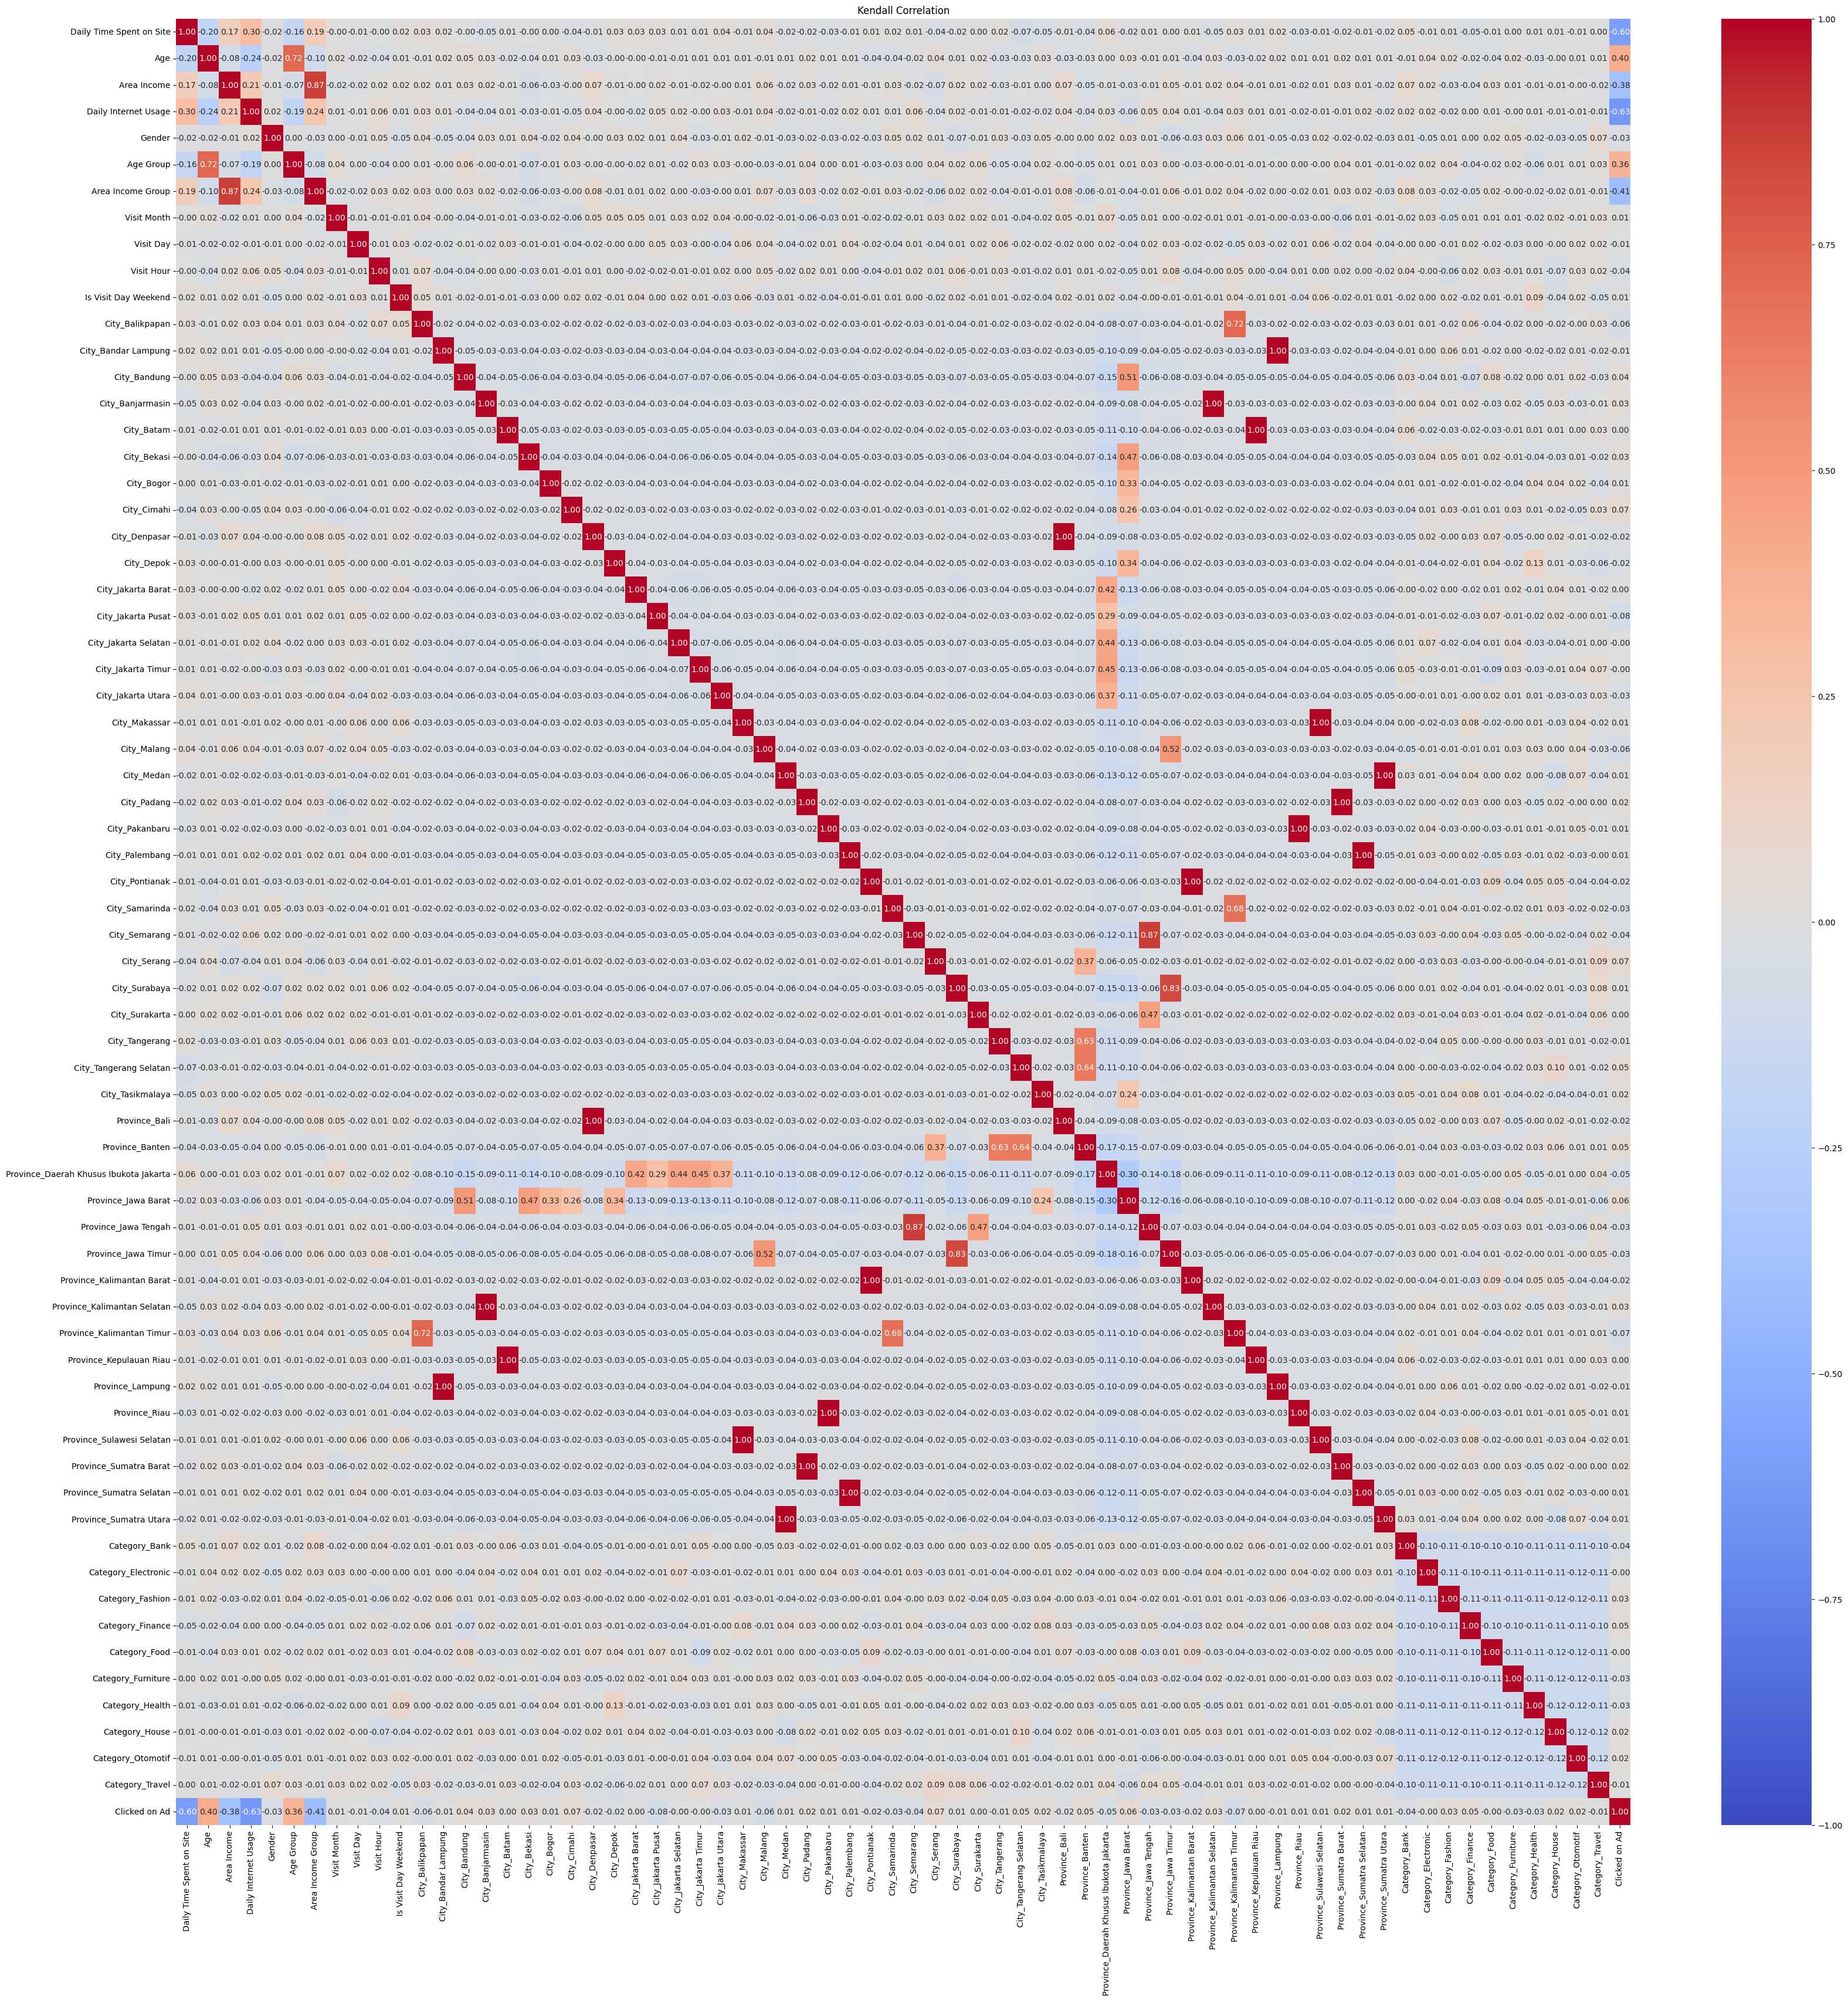

In [64]:
# Heatmap of numerical values (Kendall method)
plt.figure(figsize=(40, 40))
sns.heatmap(data=df_preprocessed.corr(method='kendall', numeric_only=True),annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Kendall Correlation')